# Renormalization of NGF simplicial complexes

In [2]:
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import pickle
import numpy as np
from Functions import renormalize, scomplex, plotting
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
plt.rcParams["text.usetex"] = True


colors = ["#003F5C","#2F4B7C","#665191","#A05195","#D45087","#F95D6A","#FF7C43","#FFA600"]
colors_sequential = colors + colors + colors + colors 
colors = ["#02405c", "#fea600", "#a20655", "#5e96c5", "#4b3596", "#fa6ca9", "#8d6cf6"]
colors_curves = colors+ colors+ colors+ colors


## Display entropic susceptibilities (fig. 3a)

Load entropic susceptibilities from file

In [5]:
d = 4 # Dimension
s = 1 # Flavour 
nrep = 10 # Number of repetitions
N = 3000 # Number of nodes


with open(f'../C_curves/NGF/d{d}s{s}b5_{nrep}rep_{N}nodes.pickle', 'rb') as handle:
    C_curves = pickle.load(handle)


if d == 1:
        laplacians_types = ["01"]
else:
    laplacians_types = ["01"]+[f"{l}{d}" for l in range(d)]

taumin = -3
taumax = 5
ntau = 200
tau_space = np.logspace(taumin,taumax,ntau)[:ntau-1]
if d == 1:
    laplacians_types = ["01"]
else:
    laplacians_types = ["01"]+[f"{k}{d}" for k in range(0,d)]

Plot curves

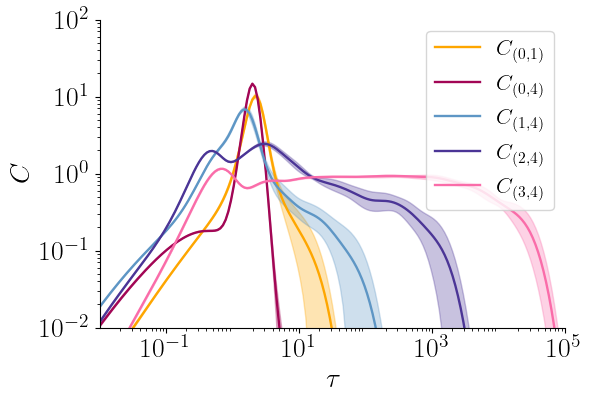

In [4]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))




for i in range(len(laplacians_types)):
    C_curves_std = np.std(C_curves[i],0)
    C_curves_mean = np.mean(C_curves[i],0)
    ax.fill_between(tau_space, C_curves_mean + 1.96*C_curves_std/np.sqrt(nrep),C_curves_mean - 1.96*C_curves_std/np.sqrt(nrep), alpha=0.3, color = colors_curves[i+1])
    ax.semilogx(tau_space,C_curves_mean, color = colors_curves[i+1],linewidth = 1.7, label = f"$C_{{({laplacians_types[i][0]},{laplacians_types[i][1]})}}$")


ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylim([10**-2,100])

ax.set_xlim([10**-2,10**5])
ax.legend(fontsize = 16)
ax.set_xlabel(r"$\tau$",fontsize = 20)
ax.set_ylabel(r"$C$",fontsize = 20)
plt.xticks([10**-1,10**1,10**3,10**5],fontsize = 20)
plt.yticks(fontsize = 20)

sns.despine()


The computation of the entropic susceptibilities can be performed with the following code

In [6]:
s = 1 # Flavour 
nrep = 10 # Number of repetitions
N = 100 # Number of nodes
beta = 5 # Inverse temperature
taumin = -3
taumax = 5
ntau = 200

In [ ]:
for d in [1,2,3]:
    print(f"DIMENSION: {d}")
    if d == 1:
        laplacians_types = ["01"]
    else:
        laplacians_types = ["01"]+[f"{l}{d}" for l in range(d)]
        
    names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]

    C_curves = []
    for n in range(nrep):
        sc = scomplex.NGF(d,N,s,beta,1)
        print(f"rep: {n}/{nrep}")
        for i,l in enumerate(laplacians_types):
            print(l)
            L = scomplex.XO_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = False)
            D,__ = scipy.linalg.eigh(L)
            entropic_susceptibility,tau_space, __ = renormalize.compute_entropic_C(D,taumin,taumax,ntau)
            if n == 0:
                C_curves.append([entropic_susceptibility])
            else:
                C_curves[i].append(entropic_susceptibility)

    with open(f'../C_curves/NGF/d{d}s{s}b{beta}_{nrep}rep_{N}nodes.pickle', 'wb') as handle:
        pickle.dump(C_curves, handle, protocol=pickle.HIGHEST_PROTOCOL)         
    

## Renormalize the simplicial complex (fig. 3a)

Create a smaller simplicial complex for visualization

In [12]:
sc = scomplex.NGF(2,100,1,beta = 2,M = 1)

### Renormalization with the standard graph Laplacian

100
43
37
37


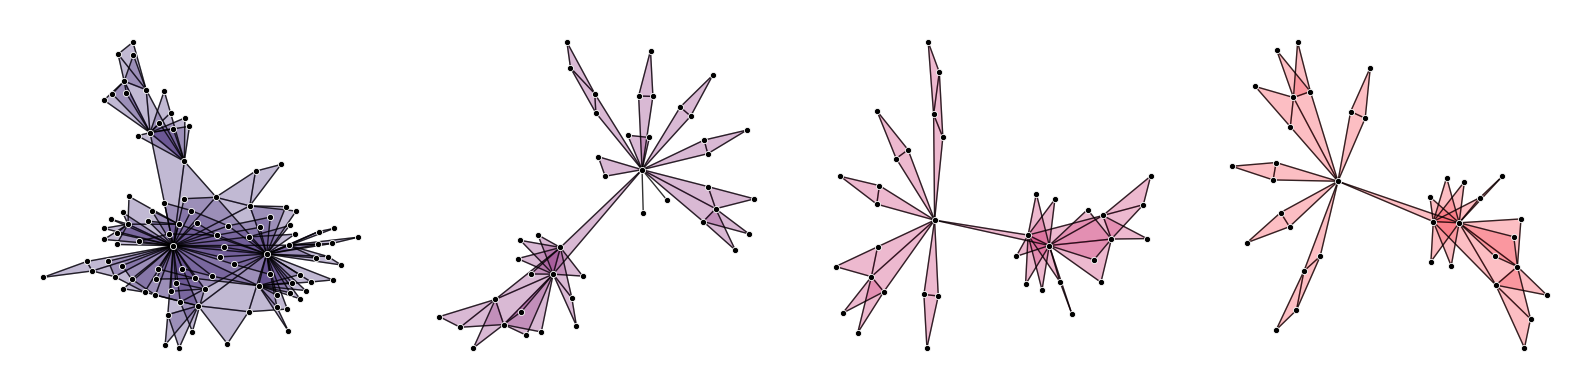

In [14]:
lmax = 4 # Number of steps
diff_order = 0 # Diffusion order
int_order = 1 # Interaction order
tau = 0.3 # Diffusion time
VERBOSE = True # Whether to print the number of nodes after each step

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, VERBOSE = VERBOSE)

# Plot sequence
f,axs = plt.subplots(1,lmax,figsize = (4*lmax,4))
i = 0
for new_sc in sequence:
    col = colors_sequential[i+2]
    plotting.plot_complex(new_sc,ax = axs[i],face_color=[col],face_alpha=0.4,node_size=20,iterations=2000)
    axs[i].collections[1].set_alpha(0.8)
    axs[i].collections[0].set_linewidth(0.6) 
    axs[i].collections[0].set_edgecolor("#FFFFFF") 
    i+=1
plt.tight_layout()


### Renormalization with the (1,2) cross-order Laplacian

100
44
31
29


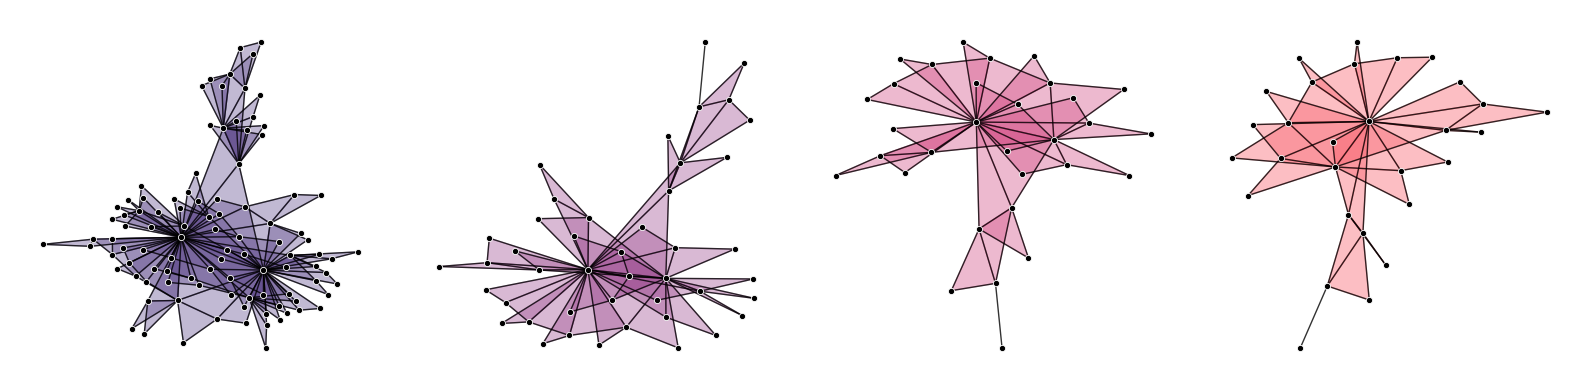

In [16]:
lmax = 4 # Number of steps
diff_order = 1 # Diffusion order
int_order = 2 # Interaction order
tau = 2 # Diffusion time
VERBOSE = True # Whether to print the number of nodes after each step

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, VERBOSE = VERBOSE)

# Plot sequence
f,axs = plt.subplots(1,lmax,figsize = (4*lmax,4))
i = 0
for new_sc in sequence:
    col = colors_sequential[i+2]
    plotting.plot_complex(new_sc,ax = axs[i],face_color=[col],face_alpha=0.4,node_size=20,iterations=2000)
    axs[i].collections[1].set_alpha(0.8)
    axs[i].collections[0].set_linewidth(0.6) 
    axs[i].collections[0].set_edgecolor("#FFFFFF") 
    i+=1
plt.tight_layout()


## Plot the number of remaining nodes as a function of scale (fig. 3c)

Generate the simplicial complex

In [31]:
sc = scomplex.NGF(2,2000,1,beta = 5,M = 1)

Compute the eigendecompositions of the Laplacian matrices considered

In [32]:
taumin = -2
taumax = 6
ntau = 250

diff_order = 1
int_order = 2

# Compute the cross-order Laplacian and its eigendecomposition
L = scomplex.XO_laplacian(sc,diff_order,int_order)
D, U = np.linalg.eigh(L)
# Compute the cross-order Laplacian's entropic susceptibility
specific_heat,tau_space, __ = renormalize.compute_entropic_C(D,taumin,taumax,ntau)

# Compute the graph Laplacian and its eigendecomposition
L = scomplex.XO_laplacian(sc,0,1)
D0,U0 = np.linalg.eigh(L)
# Compute the graph Laplacian's entropic susceptibility
specific_heat0,tau_space, __ = renormalize.compute_entropic_C(D0,taumin,taumax,ntau)

/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:28: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Compute the amount of nodes of the renormalized simplicial complex as a function of tau

In [33]:
N = 50
tau_space_spars = tau_space[0:-1:len(tau_space)//N]
nodes12 = np.zeros(len(tau_space_spars))
nodes01 = np.zeros(len(tau_space_spars))

for i,t in enumerate(tau_space_spars):
    print(i)
    new_sc, mapnodes, clusters = renormalize.renormalize_single_step(sc, tau = t, diff_order = 1, int_order = 2, D = D, U = U,VERBOSE = False)
    new_sc2, mapnodes, clusters = renormalize.renormalize_single_step(sc, tau = t, diff_order = 0, int_order = 1, D = D0, U = U0,VERBOSE = False)
    nodes12[i] = new_sc["n0"]
    nodes01[i] = new_sc2["n0"]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


Plot the results

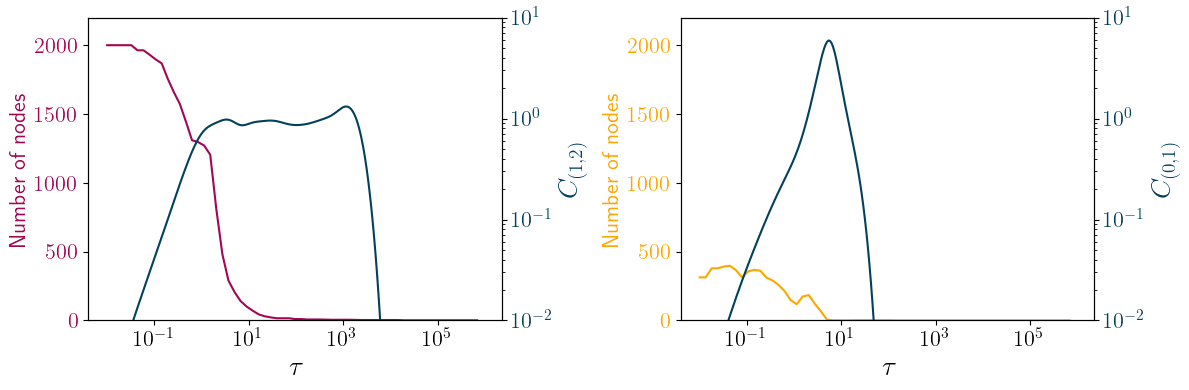

In [34]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

ax1 = axs[0]
ax1.set_xlabel(r'$\tau$',fontsize = 20)
ax1.set_ylabel('Number of nodes', color=colors_curves[2],fontsize = 16)
ax1.semilogx(tau_space_spars, nodes12, color=colors_curves[2])
ax1.tick_params(axis='y', labelcolor=colors_curves[2])
ax1.set_ylim([0,sc["n0"]+200])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = colors_curves[0]
ax2.set_ylabel('$C_{{(1,2)}}$', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.loglog(tau_space, specific_heat, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([10**-2,10])

ax3 = axs[1]
ax3.set_xlabel(r'$\tau$',fontsize = 20)
ax3.set_ylabel(r"Number of nodes", color=colors_curves[1],fontsize = 16)
ax3.semilogx(tau_space_spars, nodes01, color=colors_curves[1])
ax3.tick_params(axis='y', labelcolor=colors_curves[1])
ax3.set_ylim([0,sc["n0"]+200])

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = colors_curves[0]
ax4.set_ylabel('$C_{{(0,1)}}$', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax4.loglog(tau_space, specific_heat0, color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim([10**-2,10])


ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax4.tick_params(axis='both', which='major', labelsize=16)


plt.tight_layout()  # otherwise the right y-label is slightly clipped


## Check that the plateau is preserved (fig. 3d)

In [17]:
sc = scomplex.NGF(2,2000,1,beta = 5,M = 1)

In [18]:
taumin = -2
taumax = 6
ntau = 250

diff_order = 1
int_order = 2

# Compute the cross-order Laplacian and its eigendecomposition
L = scomplex.XO_laplacian(sc,diff_order,int_order)
D, U = np.linalg.eigh(L)
# Compute the cross-order Laplacian's entropic susceptibility
specific_heat,tau_space, __ = renormalize.compute_entropic_C(D,taumin,taumax,ntau)

# Compute the graph Laplacian and its eigendecomposition
L = scomplex.XO_laplacian(sc,0,1)
D0,U0 = np.linalg.eigh(L)
# Compute the graph Laplacian's entropic susceptibility
specific_heat0,tau_space, __ = renormalize.compute_entropic_C(D0,taumin,taumax,ntau)

/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:28: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [19]:
# Perform one step of the higher-order Laplacian renormalization of order (1,2)
taustar = 0.6
diff_order_ren = 1
int_order_ren = 2
new_sc, mapnodes, clusters = renormalize.renormalize_single_step(sc, tau = taustar, diff_order = diff_order_ren, int_order = int_order_ren, D = D, U = U)

# Perform one step of the Laplacian renormalization 
tauref = 0.06
new_sc_ref, mapnodes, clusters = renormalize.renormalize_single_step(sc, tau = tauref, diff_order =0, int_order = 1, D = D0, U = U0)


1423
517


In [20]:
# Compute the entropic susceptibility after the cross-order renormalization
Lnew = scomplex.XO_laplacian(new_sc, diff_order,int_order)
Dnew, __ = np.linalg.eigh(Lnew)
new_specific_heat,tau_space, __ = renormalize.compute_entropic_C(Dnew,taumin,taumax,ntau)

# Compute the entropic susceptibility after the graph Laplacian renormalization
Lnew_ref = scomplex.XO_laplacian(new_sc_ref, diff_order,int_order)
Dnew_ref, __ = np.linalg.eigh(Lnew_ref)
new_specific_heat_ref,tau_space, __ = renormalize.compute_entropic_C(Dnew_ref,taumin,taumax,ntau)

Plot the results

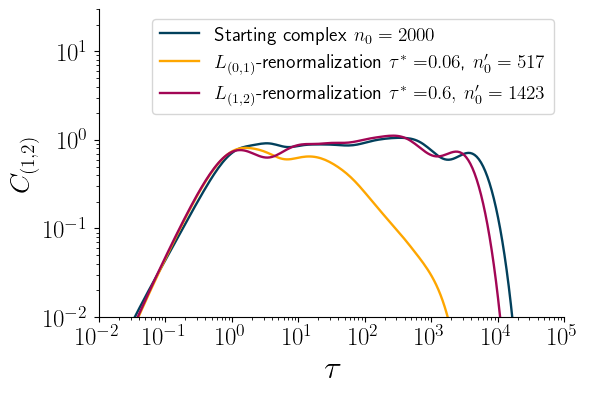

In [21]:
f,ax = plt.subplots(1,1,figsize = (6,4))

ax.loglog(tau_space,specific_heat,color = colors_curves[0],linewidth = 1.7)
ax.loglog(tau_space,new_specific_heat_ref,color = colors_curves[1],linewidth = 1.7)
ax.loglog(tau_space,new_specific_heat,color = colors_curves[2],linewidth = 1.7)

Ni = sc["n0"]
Nref = new_sc_ref["n0"]
Nnew = new_sc["n0"]

ax.set_ylim([10**-2,30])
ax.set_xlim([10**taumin,10**5])
ax.legend(["Starting complex" + f" $n_0 = {Ni}$ ","$L_{(0,1)}$-renormalization"+r" $\tau^* = $"+f"${np.round(tauref,2)}$," + f" $n'_0 = {Nref}$ ",f"$L_{{({diff_order_ren},{int_order_ren})}}$-renormalization"+r" $\tau^* = $"+f"${np.round(taustar,2)},$" + f" $n_0' = {Nnew}$ "],fontsize = 14)

ax.set_xlabel(r"$\tau$",fontsize = 24)
ax.set_ylabel(f"$C_{{({diff_order},{int_order})}}$",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)


sns.despine()

